In [32]:
#collecting list of all baseball players 
import pandas as pd
mlb=pd.read_csv('mlb.csv')
print(mlb.head())
print(mlb.shape)

              name team       position  height  weight    age
0    Adam_Donachie  BAL        Catcher      74   180.0  22.99
1        Paul_Bako  BAL        Catcher      74   215.0  34.69
2  Ramon_Hernandez  BAL        Catcher      72   210.0  30.78
3     Kevin_Millar  BAL  First_Baseman      72   210.0  35.43
4      Chris_Gomez  BAL  First_Baseman      73   188.0  35.71
(1034, 6)


In [33]:
#Getting all the stats regarding the data
mlb.describe()

,height,weight,age
count,1034.000000,1033.000000,1034.000000
mean,73.697292,201.689255,28.736712
std,2.305818,20.991491,4.320310
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.925000
75%,75.000000,215.000000,31.232500
max,83.000000,290.000000,48.520000


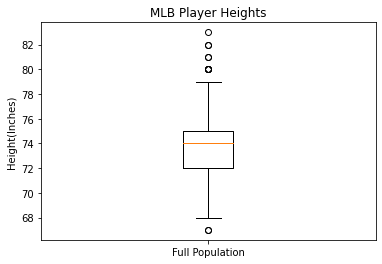

In [34]:
import matplotlib.pyplot as plt
fig1, ax1=plt.subplots()
ax1.boxplot([mlb['height']])
ax1.set_ylabel('Height(Inches)')
plt.title('MLB Player Heights')
plt.xticks([1],['Full Population'])
plt.show()

In [35]:
sample1=mlb.sample(n=30,random_state=8675309)
sample2=mlb.sample(n=30,random_state=1729)

In [36]:
sample3=[71,72,73,74,74,76,75,75,75,76,75,77,76,75,77,76,75,76,76,75,75,81,77,75,77,75,77,77,75,75]

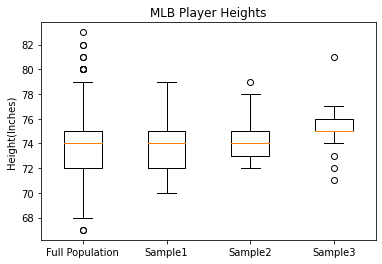

In [37]:
import numpy as np
fig1,ax1=plt.subplots()
ax1.boxplot([mlb['height'],sample1['height'],sample2['height'],np.array(sample3)])
ax1.set_ylabel('Height(Inches)')
plt.title('MLB Player Heights')
plt.xticks([1,2,3,4],['Full Population','Sample1','Sample2','Sample3'])
plt.show()

In [38]:
print(np.mean(sample1['height']))
print(np.mean(sample2['height']))
print(np.mean(sample3))

73.8
74.36666666666666
75.43333333333334


In [39]:
alldifferences=[]
for i in range(1000):
    newsample1=mlb.sample(n=30,random_state=i*2)
    newsample2=mlb.sample(n=30,random_state=i*2+1)
    alldifferences.append(newsample1['height'].mean()-newsample2['height'].mean())
print(alldifferences[0:10])

[0.8333333333333286, -0.30000000000001137, -0.10000000000000853, -0.1666666666666572, 0.06666666666667709, -0.9666666666666686, 0.7999999999999972, 0.9333333333333371, -0.5333333333333314, -0.20000000000000284]


C:\Users\Bhagavan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


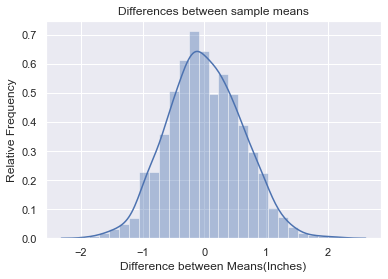

In [40]:
import seaborn as sns
sns.set()
ax=sns.distplot(alldifferences).set_title("Differences between sample means")
plt.xlabel('Difference between Means(Inches)')
plt.ylabel('Relative Frequency')
plt.show()

In [41]:
#Checking the sample means differences with greater than 1.6 in 1000 samples
largedifferences=[diff for diff in alldifferences if abs(diff)>=1.6]
print(len(largedifferences))

8


In [42]:
smalldifferences=[diff for diff in alldifferences if abs(diff)>=0.6]
print(len(smalldifferences))

314


In [43]:
#Hypothesis 0: sample 1 and sample 3 are random samples from the same population
#Hypothesis 1: sample 1 and sample 3 are not random samples from the same population

In [44]:
import scipy.stats
scipy.stats.ttest_ind(sample1['height'],sample3)

Ttest_indResult(statistic=-3.108694797644094, pvalue=0.002910554741439718)

In [45]:
#Hence here we reject Hypothesis 0 whcih says they are from same population

In [46]:
import scipy.stats
scipy.stats.ttest_ind(sample1['height'],sample2['height'])


Ttest_indResult(statistic=-1.0839563860213952, pvalue=0.2828695892305152)

In [47]:
#Here for sample 1 and sample 2, the pvalue is greater than significance level(0.05) which inds they are from same population

In [48]:
scipy.stats.mannwhitneyu(sample1['height'],sample2['height'])

MannwhitneyuResult(statistic=392.0, pvalue=0.38913738408151577)

In [49]:
desktop=pd.read_csv('desktop.csv')
laptop=pd.read_csv('laptop.csv')

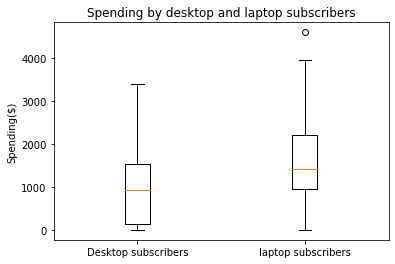

In [50]:
import matplotlib.pyplot as plt
sns.reset_orig()
fig1,ax1=plt.subplots()
ax1.set_title('Spending by desktop and laptop subscribers')
ax1.boxplot([desktop['spending'].values,laptop['spending'].values])
ax1.set_ylabel('Spending($)')
plt.xticks([1,2],['Desktop subscribers','laptop subscribers'])
plt.show()

In [51]:
print(np.mean(desktop['age']))
print(np.mean(laptop['age']))

35.766666666666666
38.733333333333334


In [52]:
#Hypothesis 0: The two email lists are random samples for the same population
#Hypothesis 1: The two email lists are not random samples from the same population

In [53]:
scipy.stats.ttest_ind(vun['spending'],laptop['spending'])

Ttest_indResult(statistic=-2.109853741030508, pvalue=0.03919630411621095)

In [54]:
#so we reject null hypothesis and send separate emails fo both laptop and desktop ssubscribers